In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
from sqlalchemy import create_engine, inspect
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [20]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Climate Analysis

In [25]:
# Query the Tables
# ----------------------------------
# Perform a simple query of the database
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20955b8b0f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [26]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x20955bb3860>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US'}

In [27]:
### Design a query to retrieve the last 12 months of precipitation data and plot the result
    
# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

#[month, day, year] = map(int, str(last_date)[2:-3].split('-')
#
[month, day, year] = str(last_date)[2:-3].split('-')

year_ago = dt.date(int(month), int(day), int(year)) - dt.timedelta(days=365)
year_ago


datetime.date(2016, 8, 23)

In [28]:
# Perform a query to retrieve the data and precipitation scores

prcp_results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago ).all()
prcp_results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [29]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(prcp_results, columns=['Date', 'Precipitation'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date
df.sort_values(by='Date')

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
2016-08-24,1.22
2016-08-25,0.08
2016-08-25,0.00


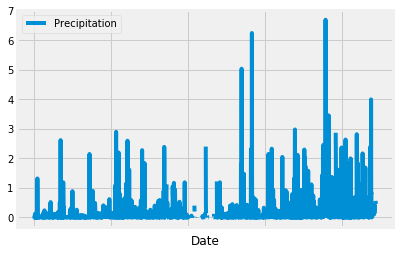

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the Results in a Matplotlib bar chart
# df.plot.bar()
# plt.xticks([], [])
# plt.tight_layout()
# plt.show()
df.plot(x_compat=True)

#plt.bar(x_axis, bars_in_cities, color="b", align="center")

![precipitation](Images/precipitation.png)

In [31]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data = {'count': df['Precipitation'].count(), 
        'mean': df['Precipitation'].mean(), 
        'std': df['Precipitation'].std(),
        'min': df['Precipitation'].min(),
        '25%': df['Precipitation'].mean(), 
        '50%': df['Precipitation'].std(),
        '75%': df['Precipitation'].min(),
        'max': df['Precipitation'].max() 
       }

stat_prcp = pd.DataFrame(data, columns = ['precipitation'])
stat_prcp


,precipitation


In [32]:
df['Precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

![describe](Images/describe.png)

In [33]:
# Design a query to show how many stations are available in this dataset?
# sel = [Dow.stock, 
#        func.unique(Measurement.station), 
#        func.avg(Dow.high_price), 
#        func.avg(Dow.low_price), 
#        func.avg(Dow.close_price)]
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\ #convert time to string
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()

prcp_results = session.query(Measurement.station).all()
           

df2 = pd.DataFrame(prcp_results,columns=['Station'])
df2['Station'].unique()

array(['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128'], dtype=object)

In [34]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# sel = [Measurement.stock, 
#        func.avg(Measurement.open_price), 
#        func.avg(Measurement.high_price), 
#        func.avg(Measurement.low_price), 
#        func.avg(Measurement.close_price)]
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Measurement.date) == "05").\ #convert time to string
#     group_by(Measurement.stock).\
#     order_by(Measurement.stock).all()
# may_averages

prcp_results2 = session.query(*[Measurement.station,func.count(Measurement.prcp)]).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.prcp).desc()).all()  
        
prcp_results2

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [Measurement.station, 
        func.min(Measurement.tobs), 
        func.max(Measurement.tobs), 
        func.avg(Measurement.tobs)]

station_results = session.query(*sel).\
        filter(Measurement.station == "USC00519281").all()
station_df = pd.DataFrame(station_results, columns = ['Station',\
        'Highest_Temp','Lowest_Temp','Avg_Temp'])
station_df

,Station,Highest_Temp,Lowest_Temp,Avg_Temp
0,USC00519281,54.0,85.0,71.663781


In [36]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.station, 
        func.count(Measurement.tobs)]

temp_results = session.query(*sel).\
        group_by(Measurement.station).all()

temp_df = pd.DataFrame(temp_results, columns = ['Station',\
        '#Temp'])
temp_df.max()

Station    USC00519523
#Temp             2772
dtype: object

In [37]:
sel = [Measurement.tobs]

temp_results = session.query(*sel).\
        filter(Measurement.station == "USC00519523").\
        filter(Measurement.date > year_ago ).all()

temp_df = pd.DataFrame(temp_results, columns = ['Temp'])
temp_df.Temp.unique()

array([79., 80., 84., 81., 78., 76., 77., 83., 82., 75., 72., 73., 70.,
       74., 67., 69., 71., 63., 64., 62., 60., 85.])

In [38]:
df.set_index('Temp', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()

KeyError: 'Temp'

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
